In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
#df = pd.read_csv("data/04022021.csv")
df = pd.read_csv("data/05022021.csv")
#df = pd.read_csv("data/job_results_second_run.csv")
df.head()

,Unnamed: 0,config/num_nodes,config/edge_density,config/discrete_node_ratio,config/discrete_signal_to_noise_ratio,config/min_discrete_value_classes,config/max_discrete_value_classes,config/continuous_noise_std,config/continuous_beta_mean,config/continuous_beta_std,...,gd_compare/error_types/false_negatives/edges,gd_compare/error_types/true_positives/rate,gd_compare/error_types/true_positives/edges,gd_compare/hamming_distance,experiment_config/algorithm/valid_parameters/discrete_limit/type,experiment_config/algorithm/valid_parameters/discrete_limit/minimum,experiment_config/algorithm/valid_parameters/discrete_limit/default,experiment_config/algorithm/valid_parameters/cores/required,experiment_config/parameters/discrete_limit,result/meta_results/discrete_limit
0,0,20,0.2,0.0,0.9,2,3,0.2,1.0,0.0,...,"[[7693, 7703], [7699, 7708], [7701, 7707], [76...",0.68750,"[[7693, 7702], [7702, 7703], [7708, 7709], [76...",0.039474,NaN,NaN,NaN,NaN,NaN,NaN
1,1,20,0.2,0.0,0.9,2,3,0.2,1.0,0.0,...,"[[7693, 7703], [7699, 7708], [7701, 7707], [77...",0.62500,"[[7693, 7702], [7702, 7703], [7698, 7699], [76...",0.044737,NaN,NaN,NaN,NaN,NaN,NaN
2,2,20,0.2,0.0,0.9,2,3,0.2,1.0,0.0,...,"[[7719, 7727], [7717, 7723], [7717, 7729], [77...",0.75000,"[[7722, 7723], [7718, 7723], [7720, 7721], [77...",0.031579,NaN,NaN,NaN,NaN,NaN,NaN
3,3,20,0.2,0.0,0.9,2,3,0.2,1.0,0.0,...,"[[7719, 7727], [7717, 7723], [7717, 7729], [77...",0.68750,"[[7722, 7723], [7718, 7723], [7720, 7721], [77...",0.036842,NaN,NaN,NaN,NaN,NaN,NaN
4,4,20,0.2,0.0,0.9,2,3,0.2,1.0,0.0,...,"[[7735, 7748], [7733, 7739], [7737, 7743], [77...",0.59375,"[[7735, 7743], [7741, 7742], [7735, 7750], [77...",0.057895,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset_config = [c for c in df.columns if c.startswith("config")]
gd_compare = [c for c in df.columns if c.startswith("gd_compare") and not c.endswith("edges")]
result = ['result/dataset_loading_time', 'result/execution_time']
experiment_config = ["experiment_config/parameters/alpha", "experiment_config/algorithm/function", "experiment_config/algorithm/package", "experiment_config/name"]

In [4]:
# Selecting relevant columns
columns = dataset_config + gd_compare + experiment_config + result

In [5]:
#Renaming columns
renaming_dict = {}
for c in columns:
    name_split = c.split("/")
    name = name_split[-1]
    
    if name == "rate":
        name = name_split[-2]
        
    renaming_dict[c] = name

cleaned_df = df[columns].rename(columns=renaming_dict)
cleaned_df.columns

Index(['num_nodes', 'edge_density', 'discrete_node_ratio',
       'discrete_signal_to_noise_ratio', 'min_discrete_value_classes',
       'max_discrete_value_classes', 'continuous_noise_std',
       'continuous_beta_mean', 'continuous_beta_std', 'num_samples', 'cores',
       'node', 'graph_edit_distance', 'mean_jaccard_coefficient',
       'false_positives', 'true_negatives', 'false_negatives',
       'true_positives', 'hamming_distance', 'alpha', 'function', 'package',
       'name', 'dataset_loading_time', 'execution_time'],
      dtype='object')

In [6]:
continous_data = cleaned_df[cleaned_df.discrete_node_ratio == 0]
mix_data = cleaned_df[cleaned_df.discrete_node_ratio > 0][cleaned_df.discrete_node_ratio < 1]
discrete_data = cleaned_df[cleaned_df.discrete_node_ratio == 1]

<ipython-input-6-4a95f828dd7a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mix_data = cleaned_df[cleaned_df.discrete_node_ratio > 0][cleaned_df.discrete_node_ratio < 1]


In [7]:
sns.set_theme(style="whitegrid")

def scatterplot(data, x: str, y: str, hue: str, size: str = None):
    f, ax = plt.subplots(figsize=(6.5, 6.5))
    sns.despine(f, left=True, bottom=True)
    return sns.scatterplot(
        x=x,
        y=y,
        hue=hue,
        size=size,
        palette="ch:r=-.2,d=.3_r",
        #hue_order=filled,
        sizes=(1, 8), linewidth=0,
        data=data, ax=ax
    )

In [8]:
#scatterplot(cleaned_df, "true_positives", "true_negatives", "edge_density")
cleaned_df[cleaned_df.alpha == 0.05]

,num_nodes,edge_density,discrete_node_ratio,discrete_signal_to_noise_ratio,min_discrete_value_classes,max_discrete_value_classes,continuous_noise_std,continuous_beta_mean,continuous_beta_std,num_samples,...,true_negatives,false_negatives,true_positives,hamming_distance,alpha,function,package,name,dataset_loading_time,execution_time
0,20,0.2,0.0,0.9,2,3,0.2,1.0,0.0,1000,...,0.985632,0.312500,0.687500,0.039474,0.05,pc,pcalg,PC GAUSS,0.0981,0.1078
2,20,0.2,0.0,0.9,2,3,0.2,1.0,0.0,2500,...,0.988506,0.250000,0.750000,0.031579,0.05,pc,pcalg,PC GAUSS,0.1731,0.1112
4,20,0.2,0.0,0.9,2,3,0.2,1.0,0.0,5000,...,0.974138,0.406250,0.593750,0.057895,0.05,pc,pcalg,PC GAUSS,0.2963,0.1615
7,20,0.2,0.0,0.9,2,3,0.2,1.0,0.0,7500,...,0.994253,0.218750,0.781250,0.023684,0.05,pc,pcalg,PC GAUSS,0.3391,0.1646
9,20,0.2,0.0,0.9,2,3,0.2,1.0,0.0,10000,...,0.974138,0.312500,0.687500,0.050000,0.05,pc,pcalg,PC GAUSS,0.4828,0.2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,50,0.6,0.4,0.9,2,3,0.2,1.0,0.0,10000,...,0.963605,0.934631,0.065369,0.300000,0.05,pc.stable,bnlearn,BNLEARN MI-CG,4.2261,28910.7948
265,50,0.4,0.4,0.9,2,3,0.2,1.0,0.0,10000,...,0.965674,0.904051,0.095949,0.200816,0.05,pc.stable,bnlearn,BNLEARN MI-CG,3.2889,31751.2311
266,50,0.4,0.6,0.9,2,3,0.2,1.0,0.0,10000,...,0.952549,0.859275,0.140725,0.202857,0.05,pc.stable,bnlearn,BNLEARN MI-CG,2.8762,32296.7099
267,100,0.2,0.4,0.9,2,3,0.2,1.0,0.0,7500,...,0.982635,0.919918,0.080082,0.106162,0.05,pc.stable,bnlearn,BNLEARN MI-CG,24.3035,28699.2625


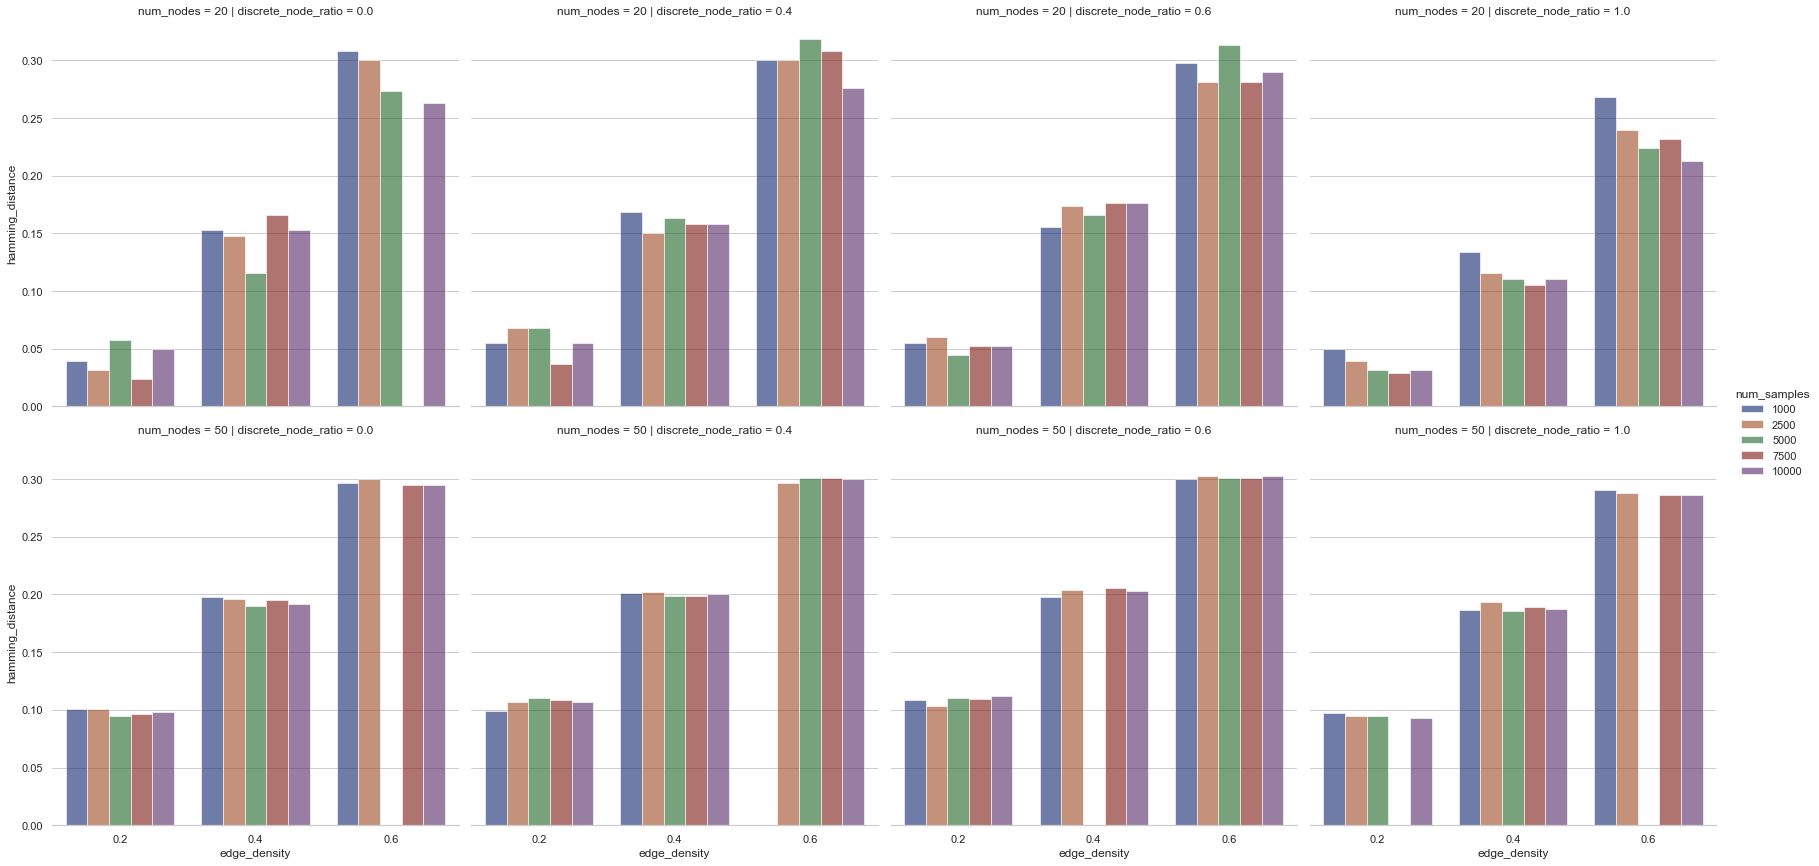

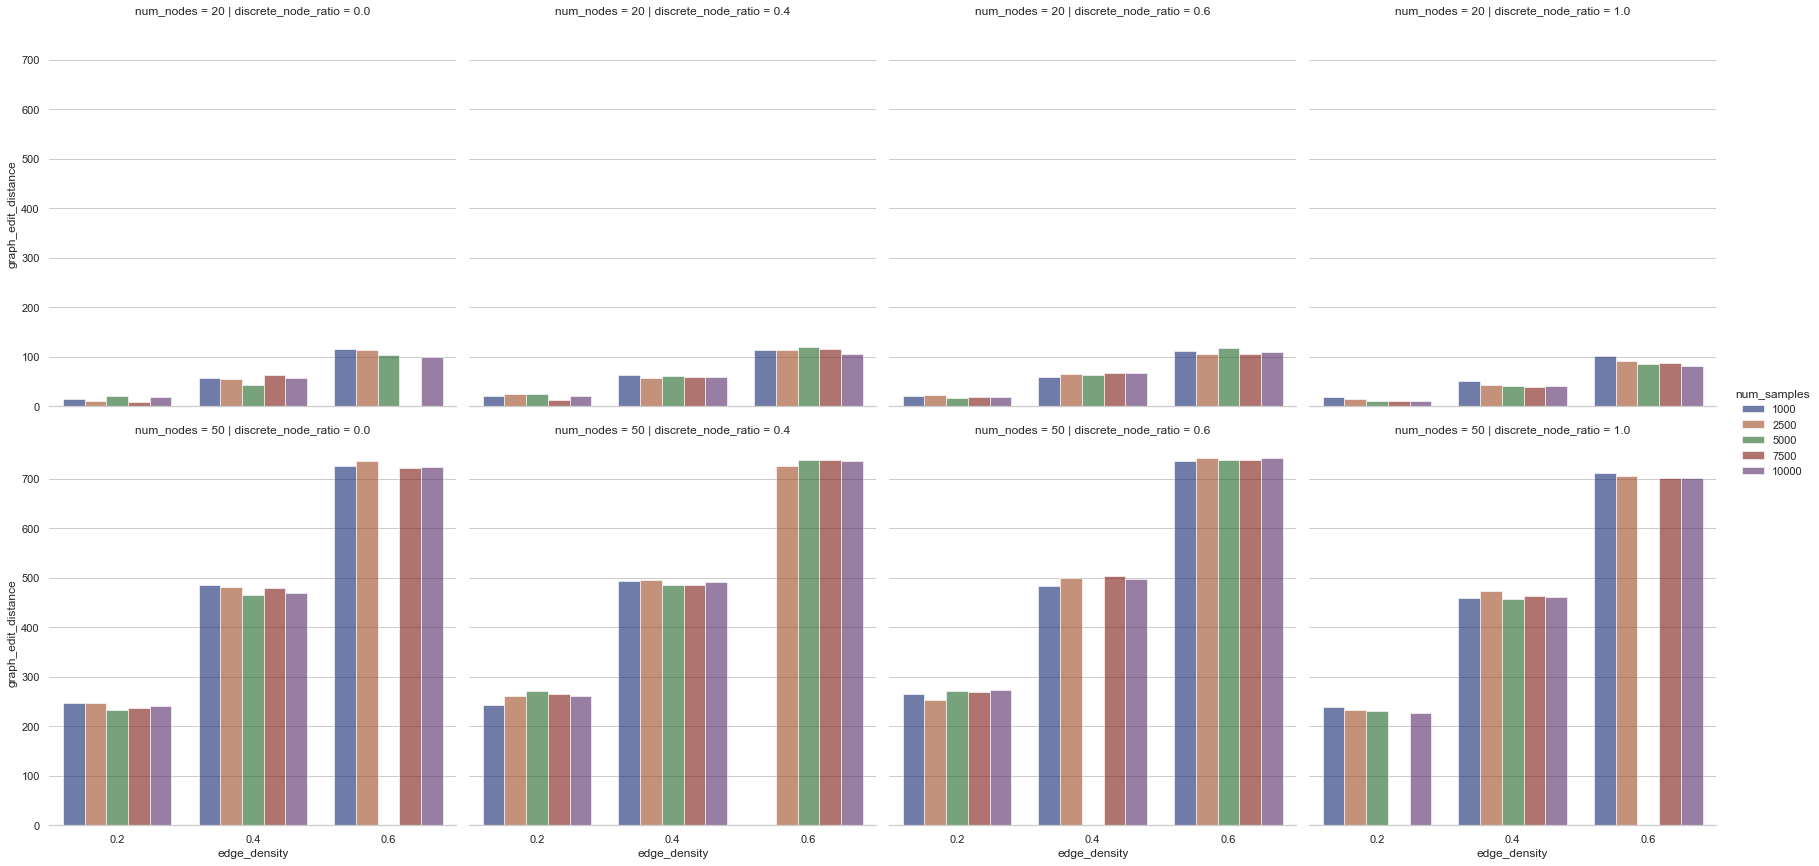

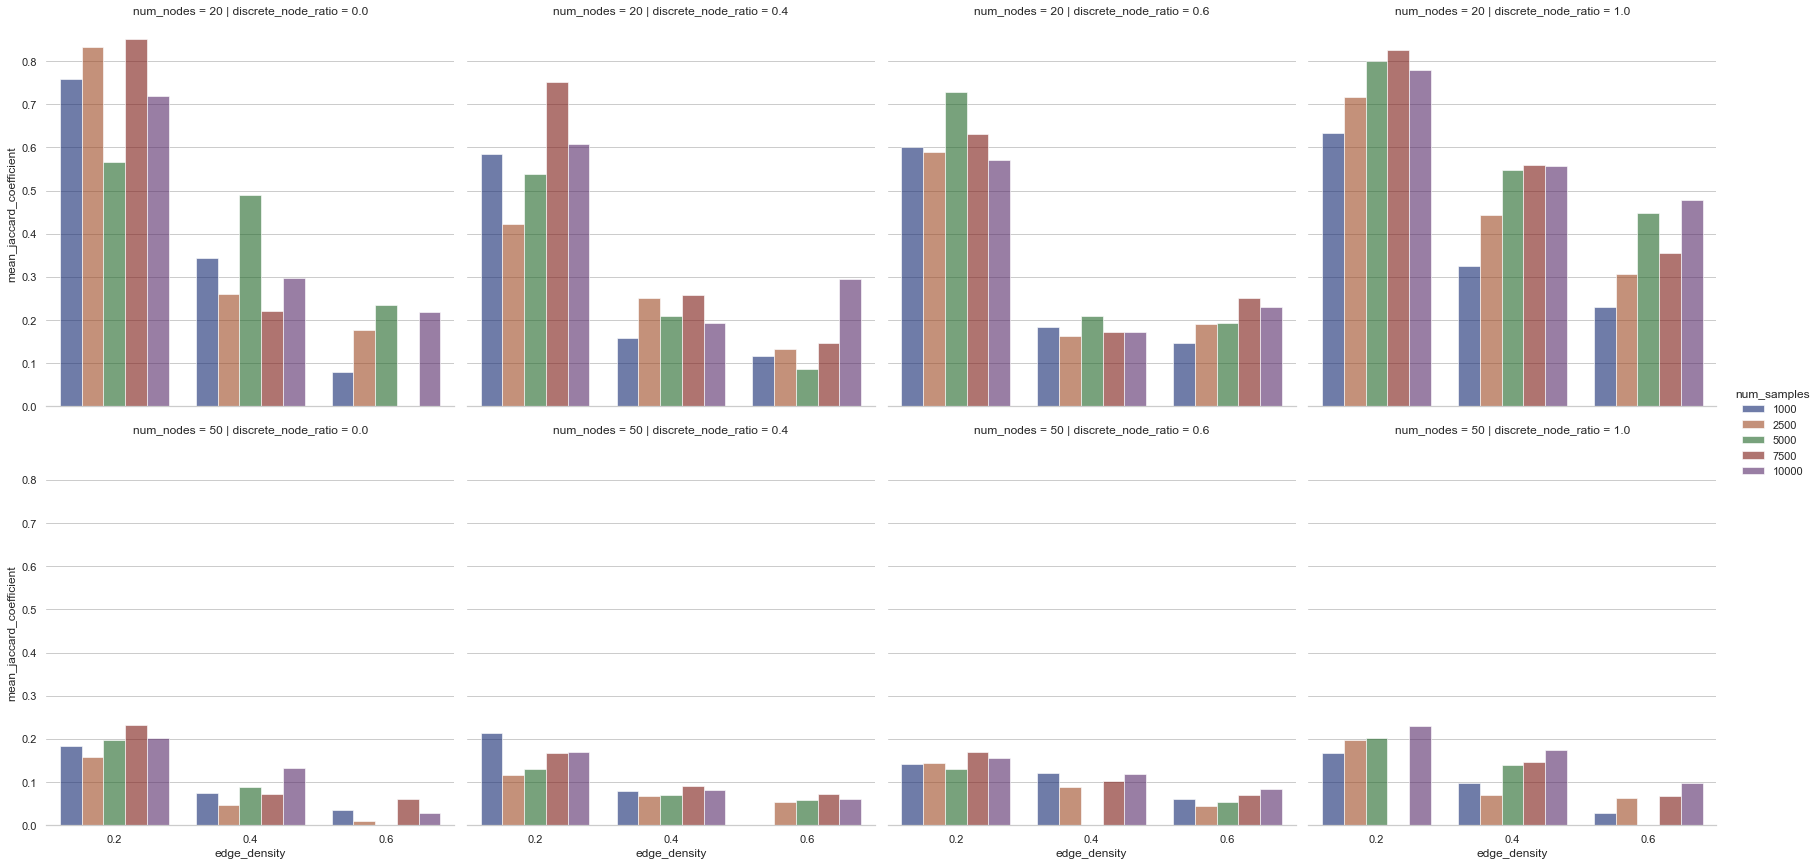

In [9]:
["num_nodes", "edge_density", "num_samples", "alpha", "discrete_node_ratio"]
metrics = ["hamming_distance", "graph_edit_distance", "mean_jaccard_coefficient"]
plotted_data = cleaned_df[(cleaned_df.alpha == 0.05) & (cleaned_df.num_nodes <= 50)]

for metric in metrics:
    
    x="edge_density"
    y=metric
    hue="num_samples"
    row="num_nodes"
    col="discrete_node_ratio"
    
    g = sns.catplot(
        data=plotted_data,
        kind="bar",
        x=x,
        y=metric,
        hue="num_samples",
        row="num_nodes",
        col="discrete_node_ratio",
        palette="dark",
        alpha=.6,
        height=6,
        facet_kws=dict(margin_titles=True),
    )
    #plt.title(f'Metric: {metric}, x={x}, y={y}, hue={hue}, row={row}, col={col}')
    display(g.despine(left=True))

In [10]:
cleaned_df.corr()
structure hemming distance?

Object `distance` not found.


In [11]:
import seaborn as sns

sns.catplot(
    cleaned_df,
    x="num_samples",
    col="edge_density",
    row="alpha",
    hue="num_nodes",
    height=3,
    facet_kws=dict(margin_titles=True),
)

/Users/lukas/anaconda3/envs/mpci-backend/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'num_nodes'

In [ ]:
["num_nodes", "edge_density", "num_samples", "alpha", "discrete_node_ratio"]

In [ ]:
cleaned_df[cleaned_df.num_nodes == 20]